# NEUROTOOL: SPINDLE, SLOW WAVE  AND SPIKE TRAIN MODULATION ANALYSIS
This notebook demonstrates how to use functions in slowwave_analysis_utils.py to automatically analyze the modulation between slow waves and spike trains of single channel electrophysiological data. In addition, a pipeline is created for ease of use, this document is created to give information about the functions in slowwave_analysis_utils.py file. 

__NOTE: slowwave_analysis_utils.py and this notebook file uses some other functions in analysis_utils.py file. Further instructions for functions in analysis_utils.py file can be found in the notebook analysis_utils.ipynb.__ 

Please make sure to install required libraries first. You can find the libraries you need by running the first code cell and reading the error message.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from analysis_utils import *
from slowwave_analysis_utils import *

## 1. Loading the data and creating a dummy spike train
As an example, we load 30 seconds of N3 sleep on a single frontal EEG channel sampled at 100 Hz.
For demonstration purposes, we will create a dummy spike train that is intentionally arranged to "have" spikes in slow wave time frames, so that we can see how Neurotool helps us to analyze the modulation.

In [2]:
# Load data
data = np.load('data_full_6hrs_100Hz_Cz+Fz+Pz.npz').get('data')

#keep only some parts of the data
data = data[1, 669000:672000].astype(np.float64)

l = len(data)

# Define sampling frequency and time vector
fs = 100
times = np.arange(data.size) / fs

In [3]:
spike_train = []
for i in data:
    spike_train.append(0)
    
index = 100
while index < l:
    spike_train[index] = 1
    index += 100

## 2. Plotting the data and the dummy spike train
Let's plot the data and the spike train for visualization purposes.

<IPython.core.display.Javascript object>


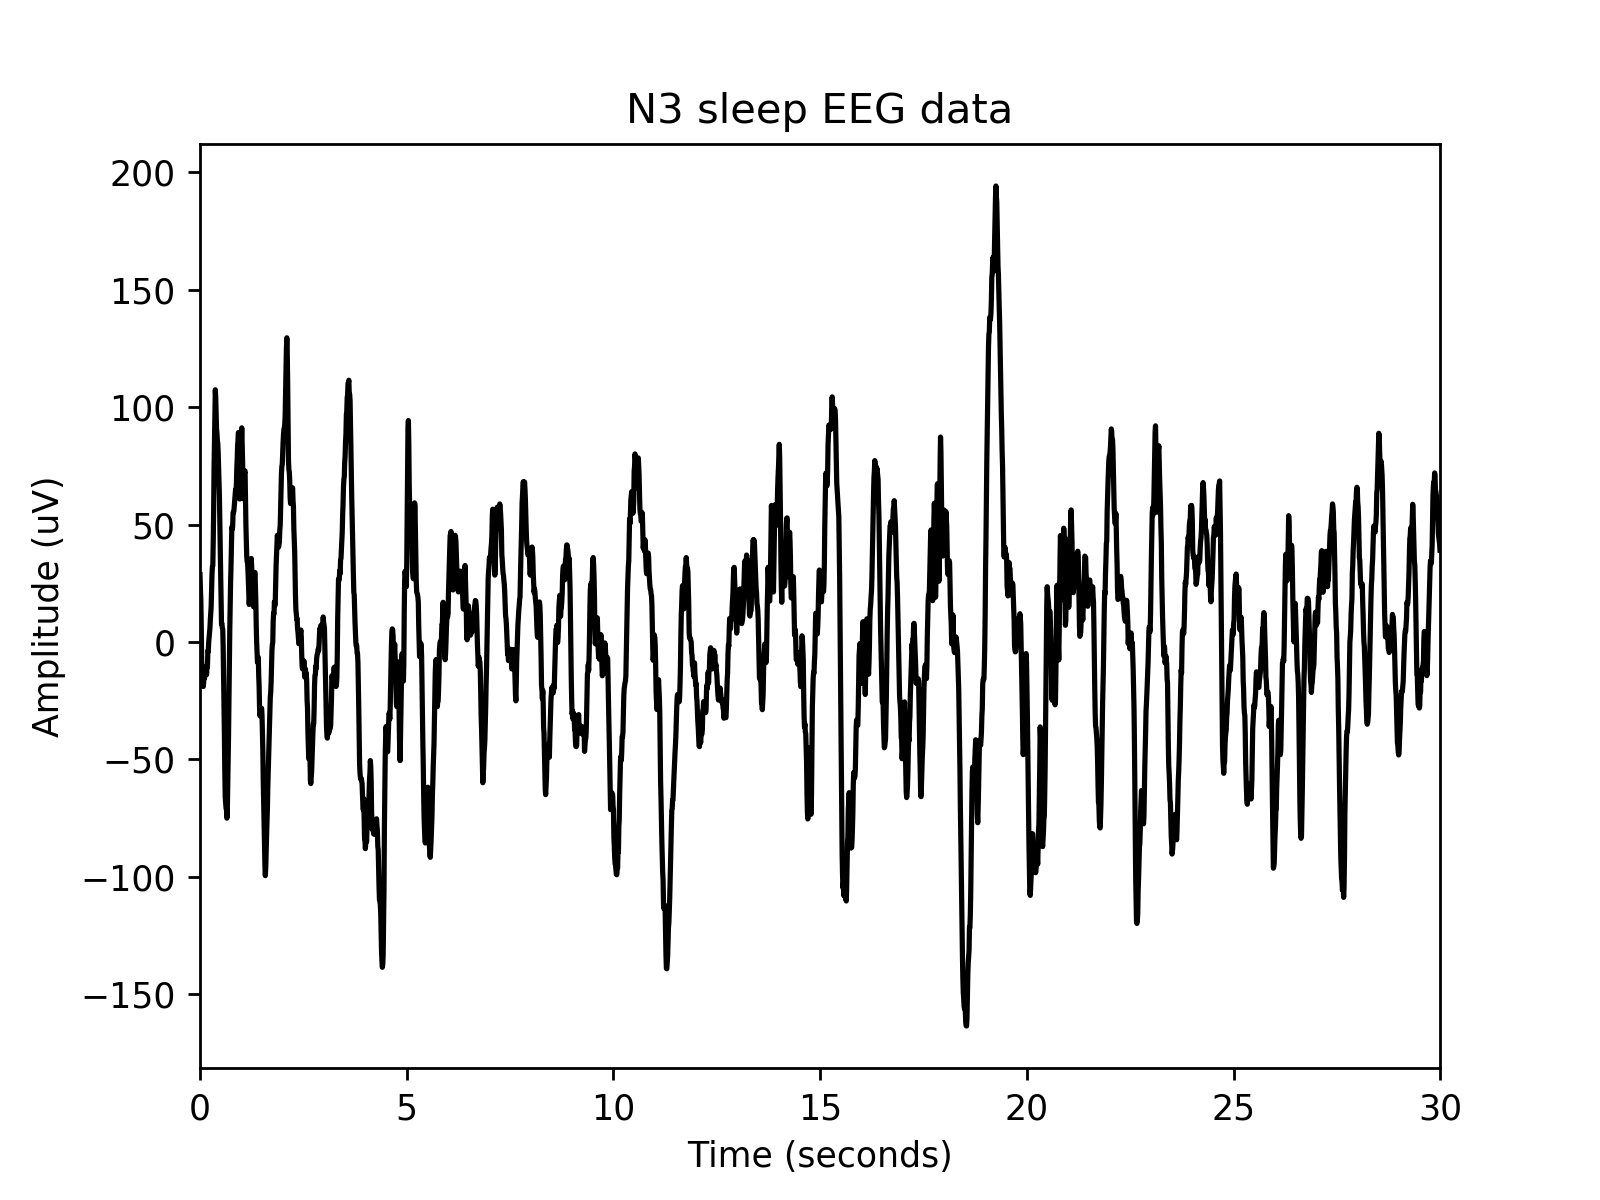

In [4]:
%matplotlib notebook
plot_data(data, times, 'Time (seconds)', 'Amplitude (uV)', 'N3 sleep EEG data', [times.min(), times.max()])

Let's plot the spike train.

<IPython.core.display.Javascript object>


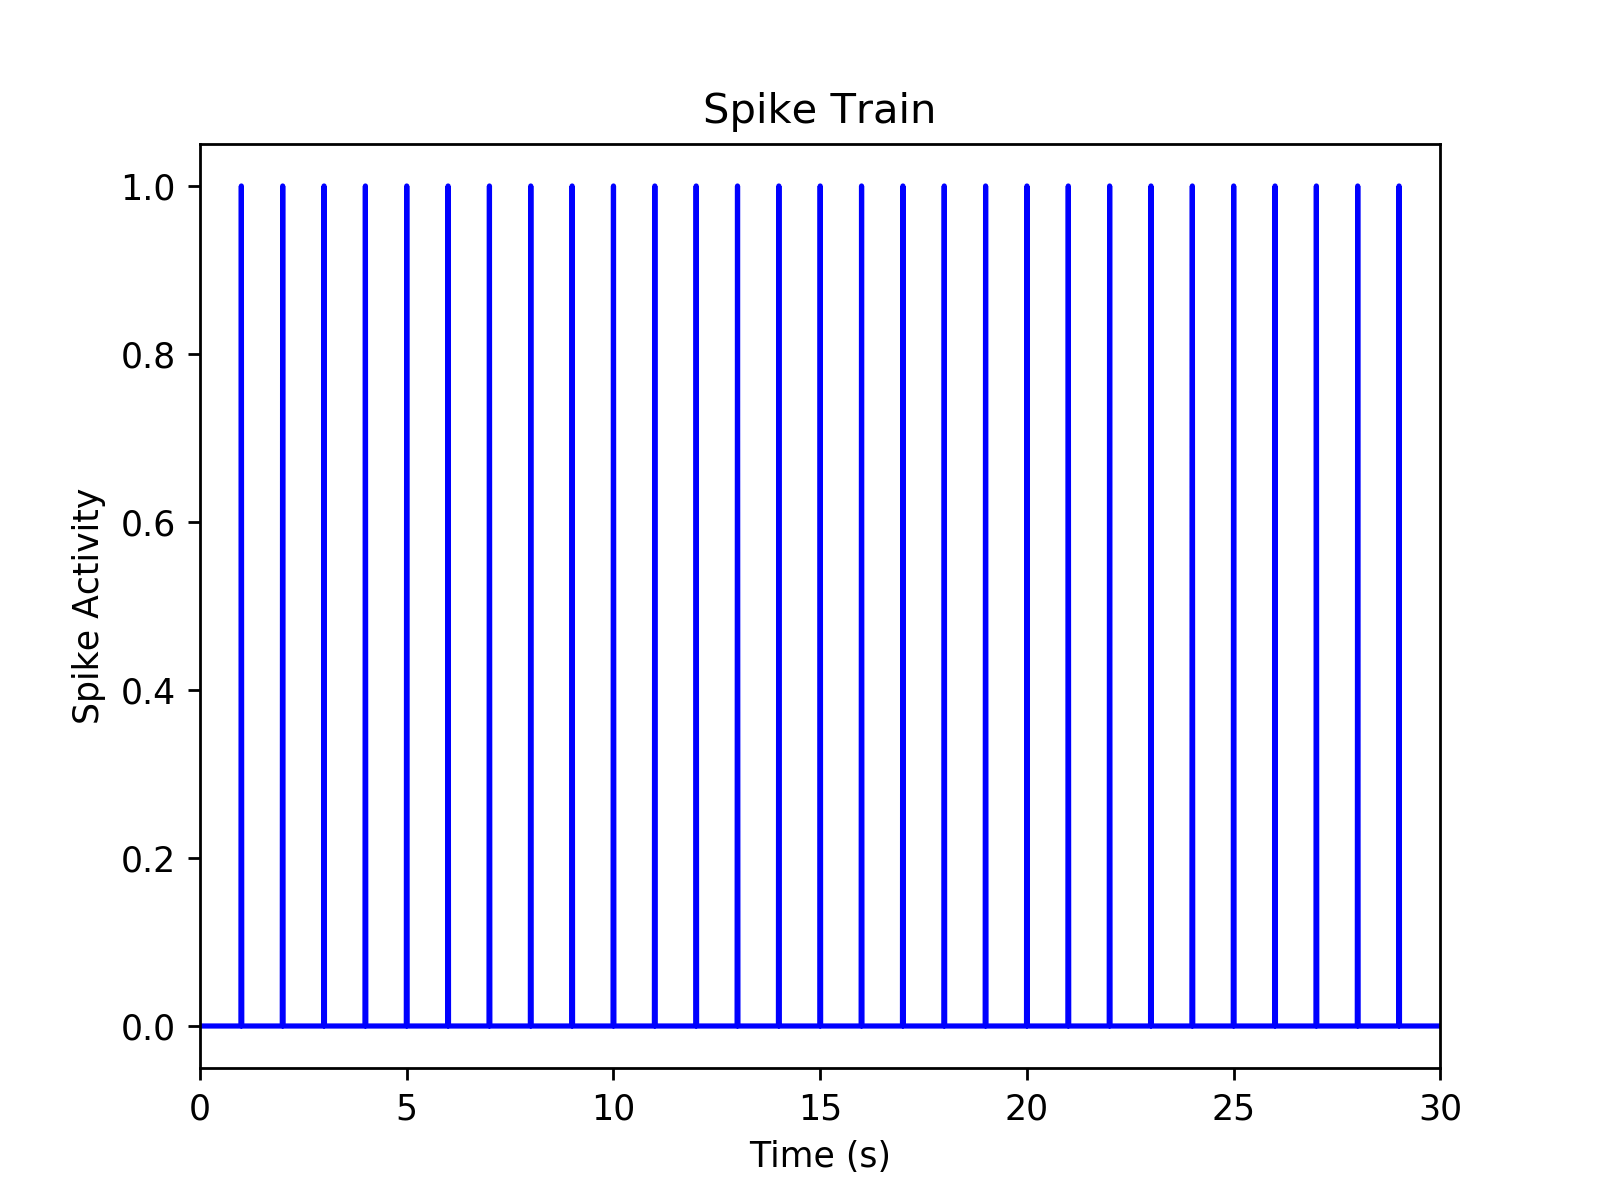

In [5]:
%matplotlib notebook
plot_spike_train(spike_train, times, [times.min(), times.max()])

Here we can see the spikes that are created manually inside the slow waves. 

## 3. Functions of Neurotool
In this section all of the functions in slowwave_analysis_utils.py will be introduced. 

__NOTE: Further details of each function (inputs and outputs) can be found in comment lines of the slowwave_analysis_utils.py file.__

### 3.1. find_slowwave function
Let's find slow waves inside the data with this function. This function makes use of the library YASA, and returns a pandas Dataframe showing detected slow waves. 

In [6]:
sw = find_slowwave(data, fs)
sw

,Start,NegPeak,MidCrossing,PosPeak,End,Duration,ValNegPeak,ValPosPeak,PTP,Slope,Frequency
0,1.20,1.57,1.79,2.10,2.36,1.16,-99.434526,89.992633,189.427159,861.032541,0.862069
1,5.33,5.52,5.77,6.11,6.49,1.16,-75.829165,40.492898,116.322063,465.288253,0.862069
2,8.20,8.39,8.64,8.85,8.97,0.77,-59.413275,40.391284,99.804559,399.218237,1.298701
3,9.84,10.05,10.26,10.53,11.05,1.21,-76.805344,92.237903,169.043247,804.967843,0.826446
4,11.05,11.29,11.59,11.74,11.92,0.87,-115.303804,45.593668,160.897473,536.324908,1.149425
5,14.36,14.72,14.90,15.31,15.47,1.11,-75.789110,97.387047,173.176157,962.089764,0.900901
6,15.47,15.62,16.00,16.34,16.46,0.99,-115.332609,83.634022,198.966630,523.596396,1.010101
7,16.90,17.06,17.23,17.95,18.29,1.39,-51.031714,62.752568,113.784283,669.319311,0.719424
8,19.73,20.13,20.52,20.87,21.60,1.87,-96.960727,31.545470,128.506197,329.503069,0.534759
9,22.50,22.70,22.96,23.13,23.31,0.81,-107.300648,78.356006,185.656654,714.064052,1.234568


### 3.2. plot_slowwave function
This function helps us plot slow waves on top of the data for visualization purposes.

<IPython.core.display.Javascript object>


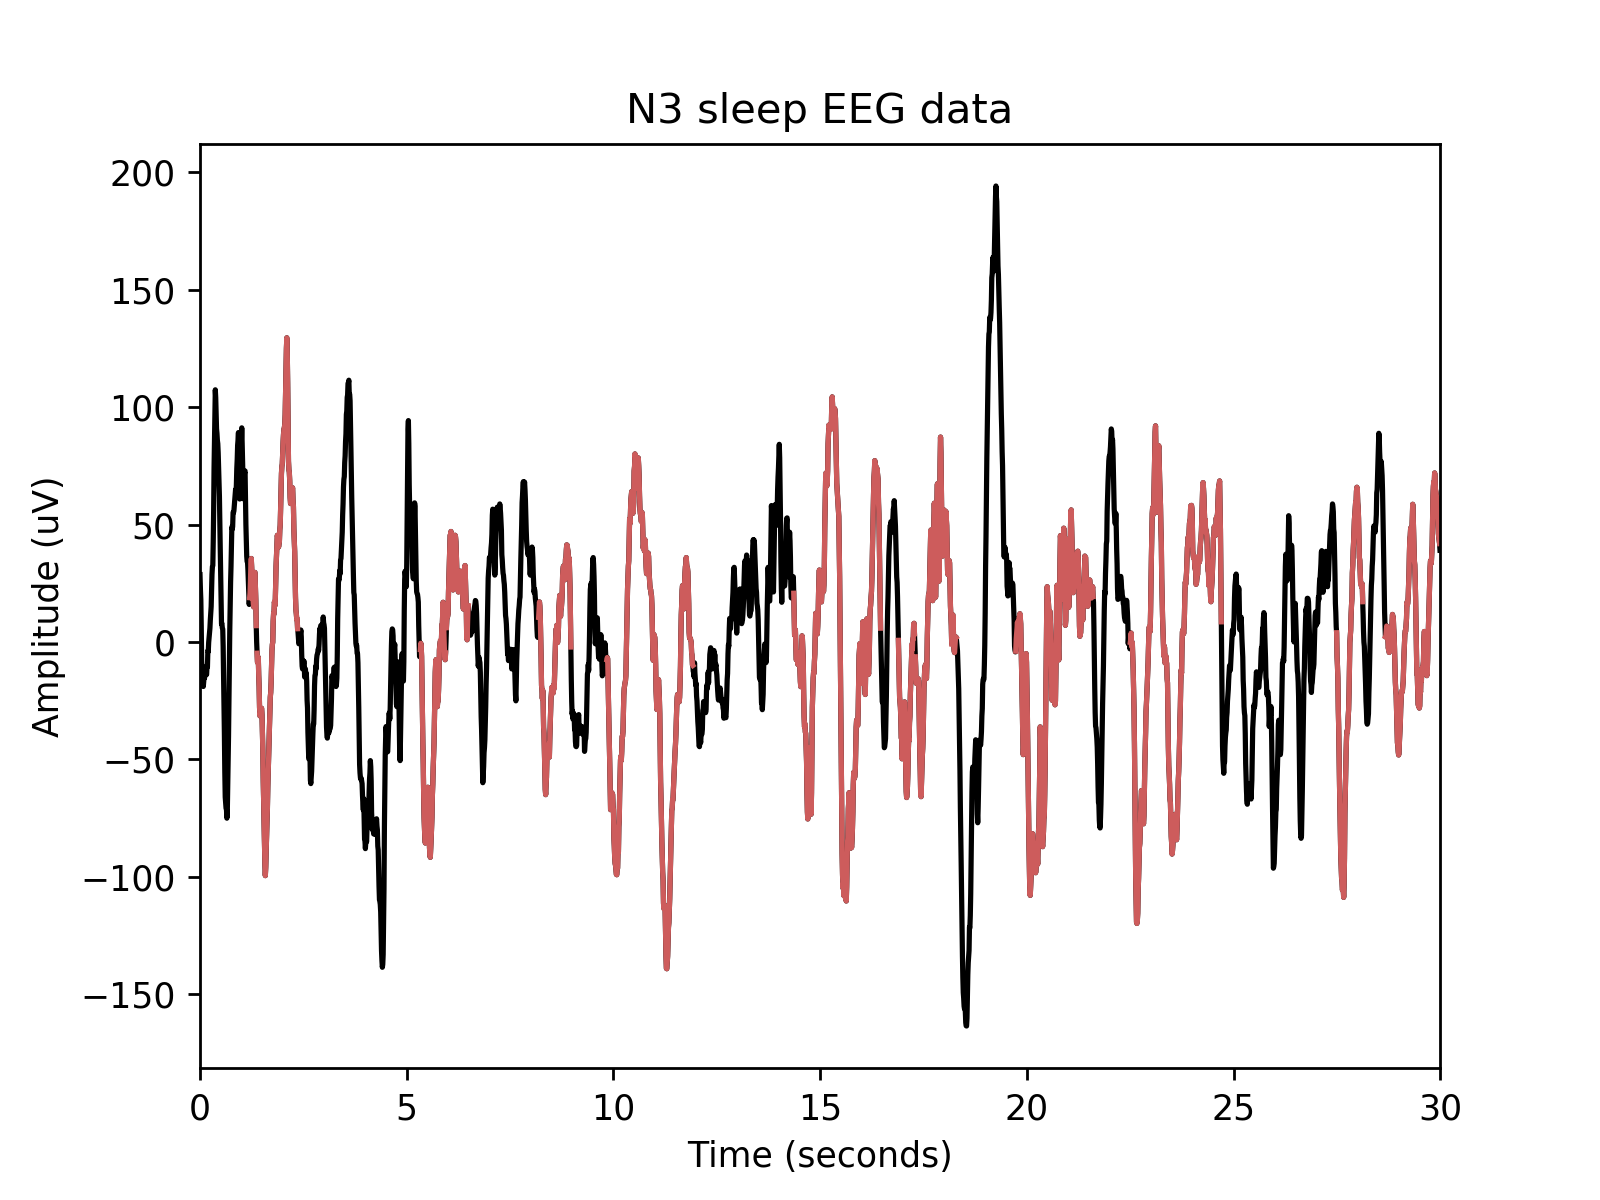

In [7]:
%matplotlib notebook
plot_slowwave(data, times, fs, sw, 'Time (seconds)', 'Amplitude (uV)', 'N3 sleep EEG data', [times.min(), times.max()])

### 3.3. slowwave_phase_hist function
This function helps us derive the phase histograms of spike train, during specific phase intervals in slow wave time. This function returns an array of 4 elements. First and second item of this array can be fed into plot_barchart and plot_polarbarchart functions in order to visualize the histogram. Third and fourth terms are dictionaries that saves phase and time aligned spike trains during slow wave periods. In the histogram, all slow wave spike trains will be added on top of each other so that we can check the modulation between slow waves and spikes. In this example phase intervals are taken to be 30 degrees.

In [8]:
phase = np.pi/6
hist = slowwave_phase_hist(sw, phase, fs, spike_train)
phase_hist_spike_trains = hist[2]
time_spike_trains = hist[3]
arr = hist[0:2]

In [9]:
phase_hist_spike_trains

{'0': [[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
  [0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330]],
 '1': [[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
  [0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330]],
 '2': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330]],
 '3': [[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
  [0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330]],
 '4': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330]],
 '5': [[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
  [0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330]],
 '6': [[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
  [0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330]],
 '7': [[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
  [0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330]],
 '8': [[0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
  [0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330]],
 '9': [[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
  [0, 30, 

In [10]:
time_spike_trains

{'0': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 '1': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,

## 4. Plotting the slow wave's phase histogram
We can use the following functions to plot histograms.

<IPython.core.display.Javascript object>


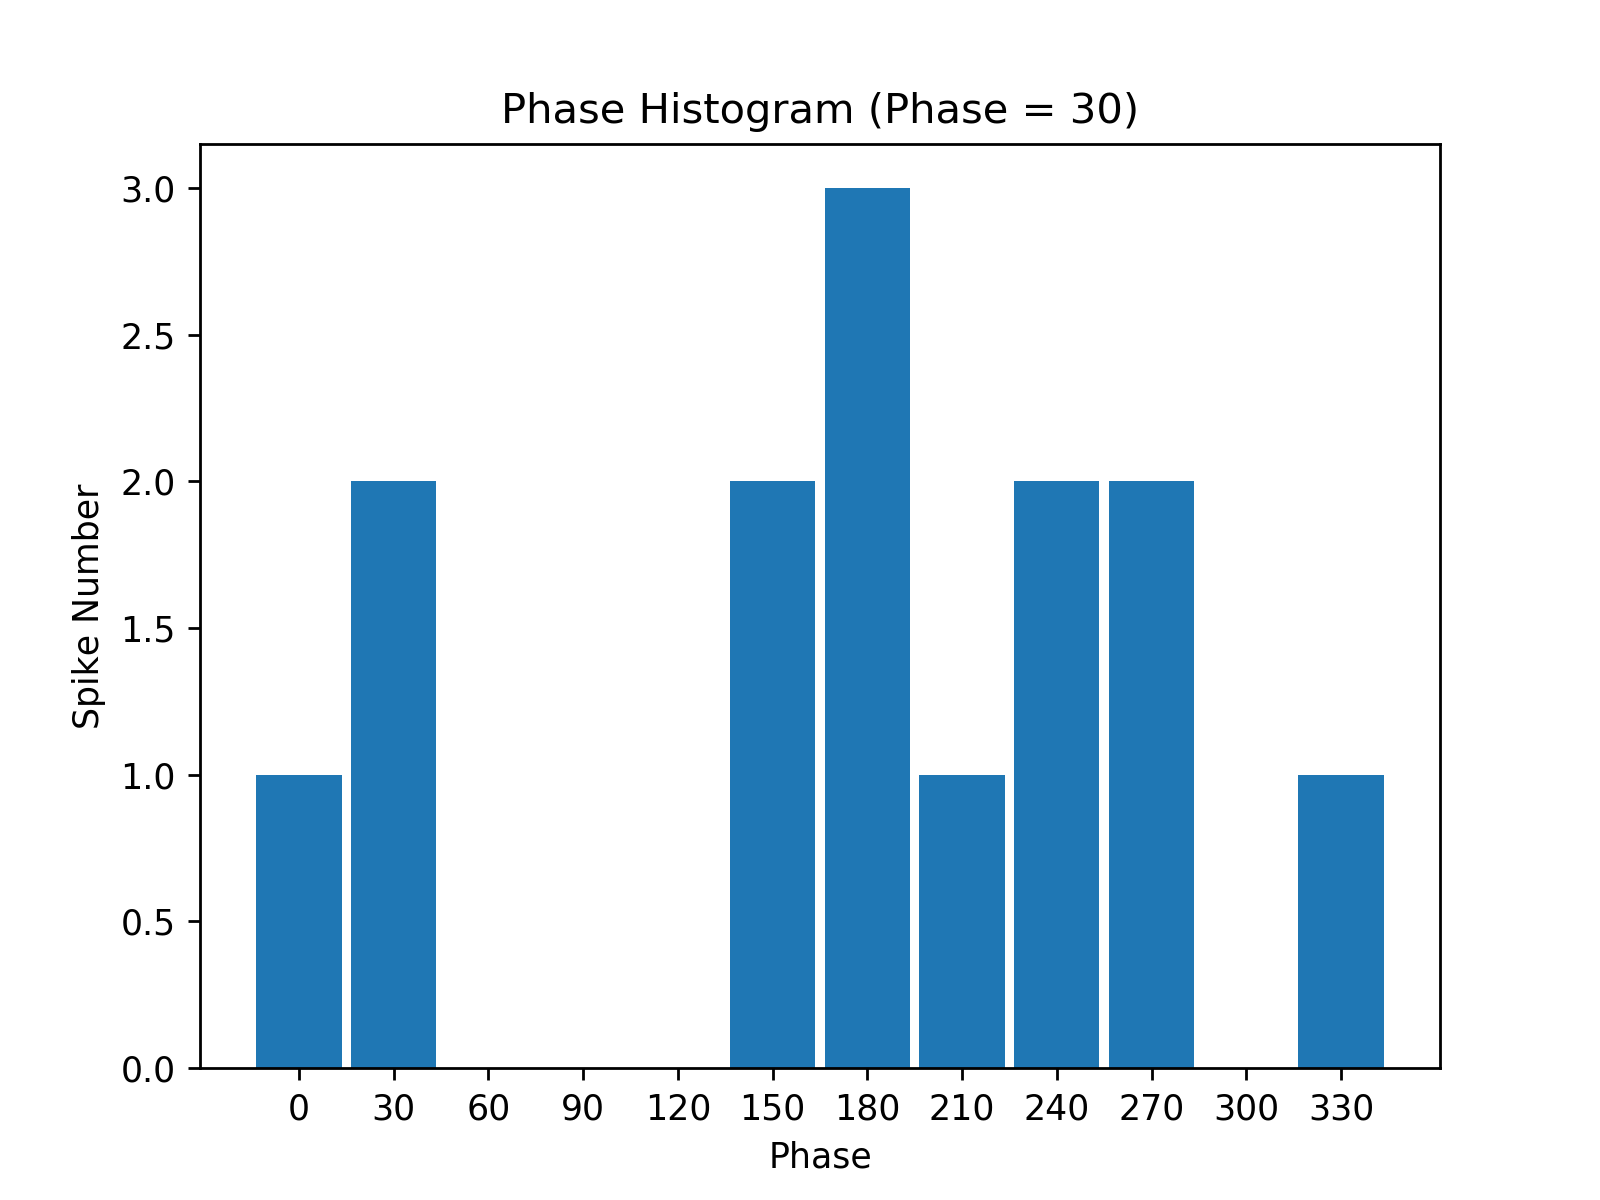

In [11]:
%matplotlib notebook
plot_barchart(arr, phase)

<IPython.core.display.Javascript object>


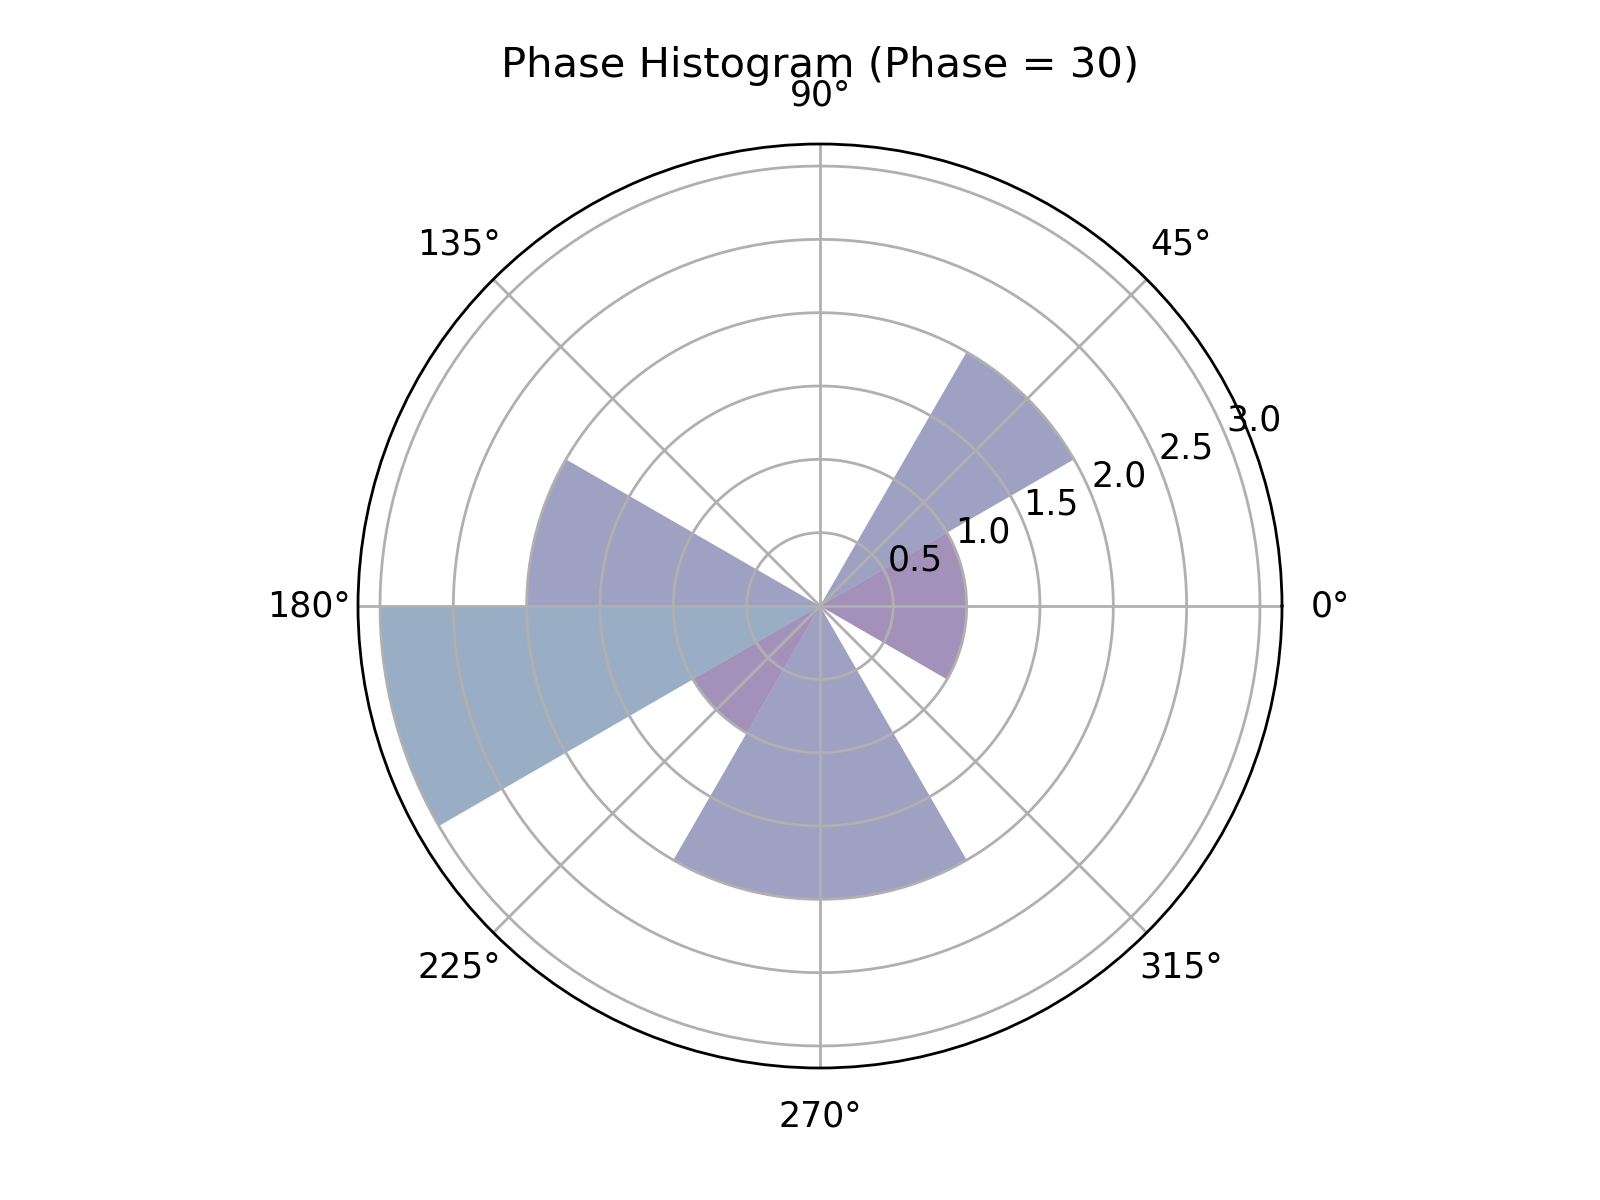

In [12]:
%matplotlib notebook
plot_polarbarchart(arr, phase)

Each slow wave's phase histogram could also be plotted both in slow wave phase by accesing the phase aligned spike train arrays in the following variable:
- phase_hist_spike_trains

You can also access time aligned spike trains during each slow wave's time in the following variable:
- time_hist_spike_trains

## 5. Conclusion
After all, looking at these histogram plots we can understand if there's a modulation between spiking pattern and slow waves. For instance, if we apply this to a huge data with a lot of slow waves, we might observe that there are a lot of spikes, relatively, in some specific phase angle. Thus, this analysis will help us to understand how slow waves correlate with the firing pattern of neurons. 

__GOOD NEWS: You don't need to learn how these functions work in order to make this analysis. I created a pipeline so that you can directly insert your data path and spike train, and all the analysis will be done by the notebook!__

This notebook is created by Mert Unsal in ETH Zurich Neuroinformatics Lab under supervision of PhD. Tansel Baran Yasar. You can reach me out at mailmertunsal@gmail.com for further questions or discussion.